In [1]:
import pandas as pd
import acbm

# Read in the data 

In [55]:
# NTS data 
legs_nts = pd.read_parquet(
    acbm.root_path / "data/external/nts/filtered/nts_trips.parquet"
)

legs_nts = legs_nts[legs_nts["TravDay"] == 3]

# Model outputs 
legs_acbm = pd.read_csv(
    acbm.root_path / "data/processed/activities_pam/legs.csv"
)
legs_acbm_geo = pd.read_parquet(
    acbm.root_path / "data/processed/activities_pam/legs_with_locations.parquet"
)



In [41]:
legs_acbm


,Unnamed: 0,pid,hid,freq,ozone,dzone,purp,origin activity,destination activity,mode,seq,tst,tet,duration
0,0,199,89,NaN,E00059031,E00058720,other,home,other,walk,1.0,1900-01-01 10:00:00,1900-01-01 10:45:00,0:45:00
1,1,199,89,NaN,E00058720,E00059031,home,other,home,walk,2.0,1900-01-01 10:45:00,1900-01-01 11:30:00,0:45:00
2,2,199,89,NaN,E00059031,E00057312,shop,home,shop,car,3.0,1900-01-01 12:00:00,1900-01-01 12:10:00,0:10:00
3,3,199,89,NaN,E00057312,E00059031,home,shop,home,car,4.0,1900-01-01 12:45:00,1900-01-01 12:55:00,0:10:00
4,4,199,89,NaN,E00059031,E00058564,work,home,work,car,5.0,1900-01-01 13:30:00,1900-01-01 13:50:00,0:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14970,14970,794026,334502,NaN,E00056891,E00057826,home,escort,home,car,4.0,1900-01-01 20:45:00,1900-01-01 21:05:00,0:20:00
14971,14971,794027,334502,NaN,E00057826,E00057536,escort,home,escort,car,1.0,1900-01-01 07:40:00,1900-01-01 07:55:00,0:15:00
14972,14972,794027,334502,NaN,E00057536,E00057826,home,escort,home,pt,2.0,1900-01-01 15:00:00,1900-01-01 15:55:00,0:55:00
14973,14973,794027,334502,NaN,E00057826,E00056882,other,home,other,pt,3.0,1900-01-01 18:35:00,1900-01-01 19:35:00,1:00:00


In [33]:
legs_nts

,TripID,DayID,IndividualID,HouseholdID,PSUID,PersNo,TravDay,seq,ShortWalkTrip_B01ID,NumStages,...,tst,tet,TripDisIncSW,TripDisExSW,TripTotalTime,TripTravTime,ozone,dzone,W5,W5xHH
4659583,2019009707,2019004508,2019000702,2019000291,2019000032,2,7,1,2,1,...,810.0,840.0,4.0,4.0,30,30.0,7,7.0,0.756184,1.000000
4659584,2019009709,2019004508,2019000702,2019000291,2019000032,2,7,3,2,1,...,1050.0,1060.0,1.0,1.0,10,10.0,7,7.0,1.004688,1.328628
4659585,2019009711,2019004512,2019000703,2019000291,2019000032,3,4,2,2,1,...,1200.0,1230.0,3.0,3.0,30,30.0,7,7.0,0.767622,1.015126
4659586,2019010362,2019004797,2019000744,2019000306,2019000033,2,2,3,2,1,...,990.0,995.0,2.0,2.0,5,5.0,2,2.0,1.048438,1.000000
4659587,2019010377,2019004802,2019000744,2019000306,2019000033,2,7,2,2,1,...,925.0,958.0,6.9,6.9,33,33.0,2,2.0,1.123451,1.071548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150103,2022111203,2022059534,2022009864,2022004368,2022000756,1,6,2,2,1,...,965.0,982.0,6.0,6.0,17,17.0,9,9.0,1.406813,1.000000
5150104,2022111204,2022059535,2022009864,2022004368,2022000756,1,7,1,2,1,...,800.0,804.0,0.5,0.5,4,4.0,9,9.0,1.613264,1.146751
5150105,2022111205,2022059535,2022009864,2022004368,2022000756,1,7,2,2,1,...,810.0,828.0,3.0,3.0,18,18.0,9,9.0,1.613264,1.146751
5150106,2022111206,2022059535,2022009864,2022004368,2022000756,1,7,3,2,1,...,960.0,985.0,3.0,3.0,25,25.0,9,9.0,1.512388,1.075046


# Compare distributions between NTS and output

# Matching 

## Matching: Trip Purpose 

## Matching: Trip Mode 

## Matching: Time of Day 

## Matching: Activity Sequences

In [65]:
import pandas as pd

def process_sequences(df, 
                      pid_col, 
                      seq_col, 
                      origin_activity_col, 
                      destination_activity_col,
                      suffix):
    # Step 1: Sort the DataFrame by 'pid' and 'seq'
    sorted_df = df.sort_values(by=[pid_col, seq_col])
    
    # Step 2: Group by 'pid' and concatenate 'origin activity' values followed by the last 'destination activity' value
    activity_sequence_df = sorted_df.groupby(pid_col).apply(
        lambda x: ' - '.join(x[origin_activity_col].tolist() + [x[destination_activity_col].iloc[-1]])
    ).reset_index()
    
    # Rename the columns for clarity
    activity_sequence_df.columns = [pid_col, 'activity_sequence']
    
    # Step 3: Group by the resulting 'activity_sequence' column and count the number of values in each group
    result = activity_sequence_df.groupby('activity_sequence').size().reset_index(name=f'count_{suffix}')    
    return result

In [60]:
sequence_nts = process_sequences(df = legs_nts, 
                                 pid_col = 'IndividualID', 
                                 seq_col = 'seq', 
                                 origin_activity_col = 'oact', 
                                 destination_activity_col = 'dact',
                                 suffix = 'nts')

sequence_nts

/tmp/ipykernel_652845/537327160.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  activity_sequence_df = sorted_df.groupby(pid_col).apply(


,activity_sequence,count_nts
0,education - education - education,4
1,education - education - education - home,1
2,education - education - education - home - oth...,1
3,education - escort,1
4,education - escort - home,2
...,...,...
1818,work - work - work - home - other - home - oth...,1
1819,work - work - work - home - work - work - home...,1
1820,work - work - work - shop - work,1
1821,work - work - work - work - home - home - home...,1


In [53]:
legs_acbm

,pid,seq,origin activity,destination activity
0,1,1,home,work
1,1,2,work,gym
2,1,3,gym,home
3,2,1,home,school
4,2,2,school,home
5,3,1,work,gym


In [61]:
sequence_acbm = process_sequences(df = legs_acbm,
                                  pid_col = 'pid', 
                                  seq_col = 'seq', 
                                  origin_activity_col = 'origin activity', 
                                  destination_activity_col = 'destination activity', 
                                  suffix = 'acbm')

sequence_acbm
                                  

/tmp/ipykernel_652845/537327160.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  activity_sequence_df = sorted_df.groupby(pid_col).apply(


,activity_sequence,count_acbm
0,home - education,10
1,home - education - escort - home,9
2,home - education - escort - shop - home,1
3,home - education - home,289
4,home - education - home - education - home,2
...,...,...
452,home - work - work - work - home - other - home,1
453,home - work - work - work - home - other - hom...,2
454,home - work - work - work - home - other - oth...,1
455,home - work - work - work - work - home,1


In [62]:
# join the two dataframes by 'activity_sequence'

# sequence_nts['activity_sequence'] = sequence_nts['activity_sequence'].str.replace(' - ', '-')

# sequence_acbm['activity_sequence'] = sequence_acbm['activity_sequence'].str.replace(' - ', '-')

sequence_nts_acbm = sequence_nts.merge(sequence_acbm, on='activity_sequence', how='inner')
sequence_nts_acbm

,activity_sequence,count_nts,count_acbm
0,home - education,45,10
1,home - education - escort - home,21,9
2,home - education - escort - shop - home,1,1
3,home - education - home,1241,289
4,home - education - home - education - home,7,2
...,...,...,...
433,home - work - work - work - home - other - home,4,1
434,home - work - work - work - home - other - hom...,1,2
435,home - work - work - work - home - other - oth...,1,1
436,home - work - work - work - work - home,4,1


<Axes: xlabel='activity_sequence'>

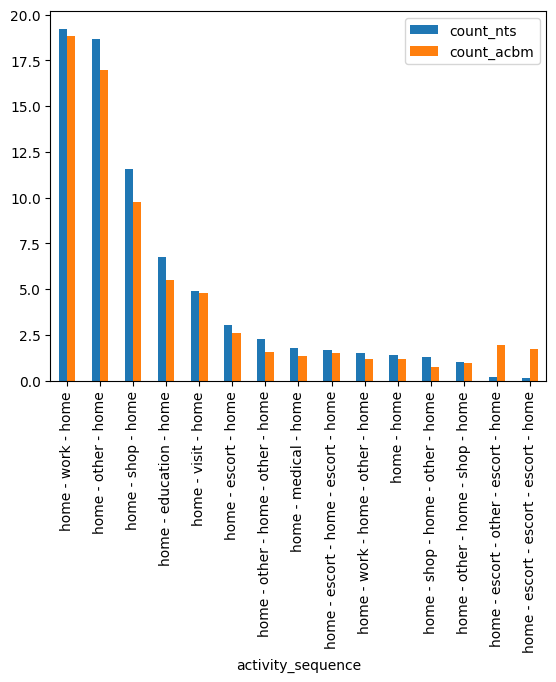

In [69]:
# bar chart of the counts 

#sequence_nts_acbm.plot(kind='bar', x='activity_sequence', y=['count_nts', 'count_acbm'])

# sort the values by 'count_nts' and plot the top 10 values

#sequence_nts_acbm.sort_values(by='count_nts', ascending=False).head(10).plot(kind='bar', x='activity_sequence', y=['count_nts', 'count_acbm'])

# plot % instead of counts

sequence_nts_acbm['count_nts'] = sequence_nts_acbm['count_nts'] / sequence_nts_acbm['count_nts'].sum() * 100
sequence_nts_acbm['count_acbm'] = sequence_nts_acbm['count_acbm'] / sequence_nts_acbm['count_acbm'].sum() * 100

# instead of top 10, keep all rows where count_nts or count_acbm > 10

sequence_nts_acbm_filtered = sequence_nts_acbm[(sequence_nts_acbm['count_nts'] > 1) | (sequence_nts_acbm['count_acbm'] > 1)]

sequence_nts_acbm_filtered.sort_values(by='count_nts', ascending=False).plot(kind='bar', x='activity_sequence', y=['count_nts', 'count_acbm'])

## Assigning: Trip distances

### Mean crowfly distance per trip purpose

### Crowfly distance cumulative chart (KM distance vs. % of trips)